## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from textblob import TextBlob
import nltk
import re
from sklearn.metrics import accuracy_score
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import STOPWORDS
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## Import/Read Datasets

In [3]:
fake = pd.read_csv("Fake.csv",encoding='ISO-8859-1')
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [4]:
true = pd.read_csv("True.csv", error_bad_lines=False, encoding='latin-1')
true.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11880\2779112429.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  true = pd.read_csv("True.csv", error_bad_lines=False, encoding='latin-1')
Skipping line 11067: expected 4 fields, saw 8



title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

## Exploratory Data Analysis (EDA)

In [5]:
true.shape, fake.shape

((21416, 4), (23481, 4))

In [6]:
true.info(),
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
true.columns, fake.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [8]:
# Adding new column to distribute Fake and Real news

# fake news represented by '0'
# true news represented by '1'


true['category'] = '1'
fake['category'] = '0'

In [9]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date category  
0  December 31, 2017         1  
1  December 29, 2017         1  
2  December 31, 2017         1  
3  December 30, 2017         1  
4  December 29, 2017         1

In [10]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamas Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date category  
0  December 31, 2017        0  
1  December 31, 2017        0  
2  December 30, 2017        0  
3  December 29, 2017        0  
4  December 25, 2017        0

In [11]:
# Resetting index

df = pd.concat([true,fake]).reset_index(drop = True)
df.shape

(44897, 5)

In [12]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date category  
0  December 31, 2017         1  
1  December 29, 2017         1  
2  December 31, 2017         1  
3  December 30, 2017         1  
4  December 29, 2017         1

In [13]:
df.tail()

title  \
44892  McPain: John McCain Furious That Iran Treated ...   
44893  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44894  Sunnistan: US and Allied Safe Zone Plan to T...   
44895  How to Blow $700 Million: Al Jazeera America F...   
44896  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
44892  21st Century Wire says As 21WIRE reported earl...  Middle-east   
44893  21st Century Wire says It s a familiar theme. ...  Middle-east   
44894  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44895  21st Century Wire says Al Jazeera America will...  Middle-east   
44896  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date category  
44892  January 16, 2016        0  
44893  January 16, 2016        0  
44894  January 15, 2016        0  
44895  January 14, 2016        0  
44896  January 12, 2016        0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44897 non-null  object
 1   text      44897 non-null  object
 2   subject   44897 non-null  object
 3   date      44897 non-null  object
 4   category  44897 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [15]:
df.subject.value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

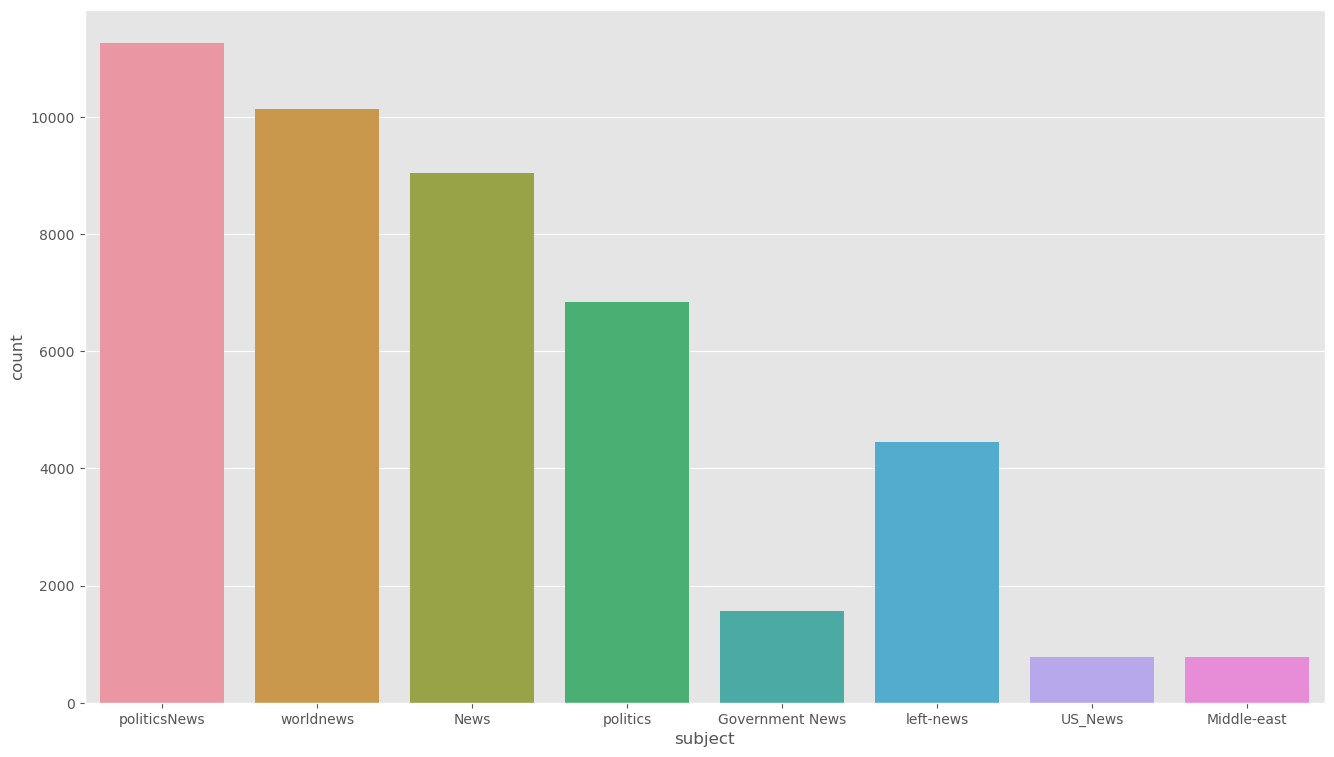

In [16]:
# lets visualize data based on the subject of the news

plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=df)

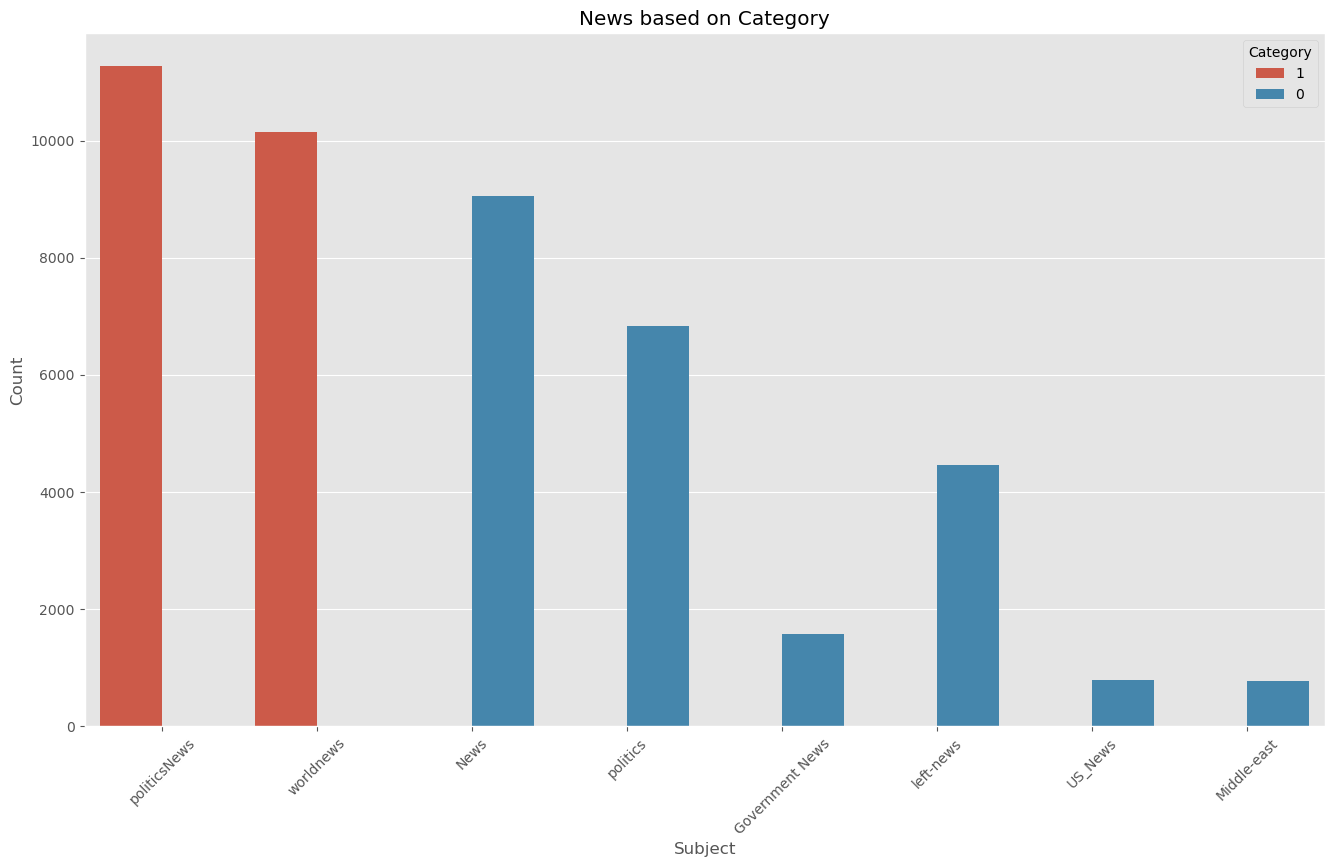

In [17]:
# breakup of true and fake news based on the category.

plt.figure(figsize=(16, 9))
sns.countplot(x='subject', hue='category', data=df)
plt.legend(title='Category', labels=['1', '0'])
plt.title('News based on Category')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Shuffling the data

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop = True)

In [19]:
df.head(10)

title  \
0  Italy lower house passes new electoral law, mo...   
1  More than 50 arrested for looting in Miami dur...   
2  Defeat of Islamic State in Raqqa may herald wi...   
3  NEW YORK KNOWN WOLF: Halloween Truck Attacker ...   
4  Democratic VP nominee Kaine expected to releas...   
5   Did Ron Paul Just Confuse Al-Qaeda With ISIS,...   
6   Report: Trump Businesses Seeking Dozens Of Sp...   
7   Trump on Twitter (Dec 21) - Tax Cuts, Home sales   
8   Trump Assaults Writer Covering His Anniversar...   
9  PRESIDENT TRUMP WARNS Comey&Tweets Veiled Thre...   

                                                text       subject  \
0  ROME (Reuters) - The Italian Chamber of Deputi...     worldnews   
1  MIAMI (Reuters) - Miami area police arrested m...     worldnews   
2  WASHINGTON (Reuters) - The defeat of Islamic S...     worldnews   
3  Shawn Helton  21st Century WireYears before al...   Middle-east   
4  WASHINGTON (Reuters) - Democratic vice preside...  politicsNews   
5  Former Texas Congressman Ron Paul added yet mo...          News   
6  During  Made In America  week, an initiative w...          News   
7  The following statements were posted to the ve...  politicsNews   
8  Natasha Stoynoff, a writer who covered Donald ...          News   
9  Donald Trump lobbed a veiled threat at the for...      politics   

                  date category  
0    October 12, 2017         1  
1  September 12, 2017         1  
2    October 17, 2017         1  
3     November 1, 2017        0  
4  September 14, 2016         1  
5      August 22, 2017        0  
6        July 21, 2017        0  
7   December 21, 2017         1  
8     October 13, 2016        0  
9         May 12, 2017        0

<Axes: ylabel='subject'>

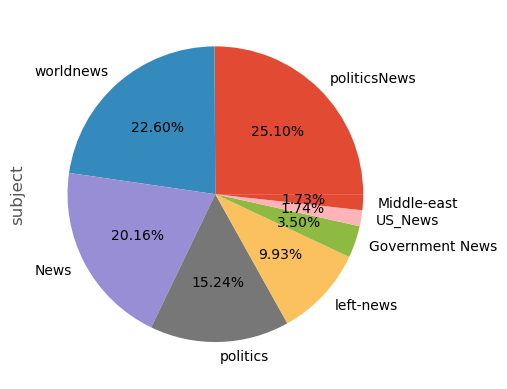

In [20]:
df['subject'].value_counts().plot(kind='pie',autopct='%0.02f%%')

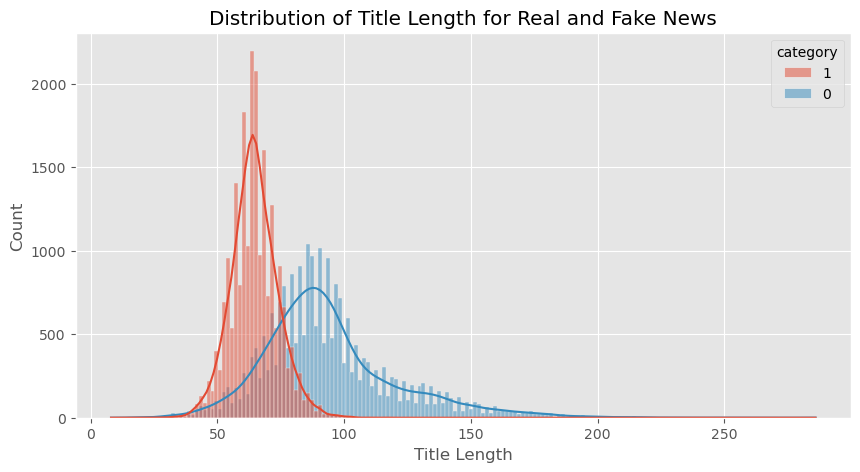

In [21]:
#Text Length Analysis
df['title_len'] = df['title'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data= df, x='title_len', hue='category', kde=True)
plt.title('Distribution of Title Length for Real and Fake News')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='category', ylabel='count'>

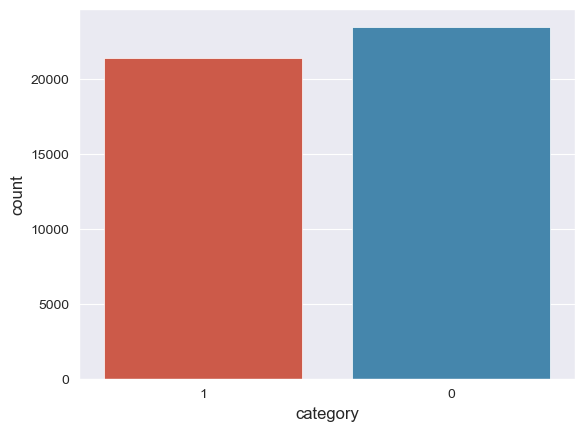

In [22]:
# Visualizing balacing of the data 

import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x= 'category', data = df)

In [23]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
category     0
title_len    0
dtype: int64

In [24]:
# From all the above exploration, it shows we have pretty balanced data with no null values
# There are total 44898 observations

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44897 non-null  object
 1   text       44897 non-null  object
 2   subject    44897 non-null  object
 3   date       44897 non-null  object
 4   category   44897 non-null  object
 5   title_len  44897 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [26]:
# Merge the 'title' and 'text' column which will be used in NLP model
df['text'] = df['title'] + " " + df['text']


In [27]:
df.head()

title  \
0  Italy lower house passes new electoral law, mo...   
1  More than 50 arrested for looting in Miami dur...   
2  Defeat of Islamic State in Raqqa may herald wi...   
3  NEW YORK KNOWN WOLF: Halloween Truck Attacker ...   
4  Democratic VP nominee Kaine expected to releas...   

                                                text       subject  \
0  Italy lower house passes new electoral law, mo...     worldnews   
1  More than 50 arrested for looting in Miami dur...     worldnews   
2  Defeat of Islamic State in Raqqa may herald wi...     worldnews   
3  NEW YORK KNOWN WOLF: Halloween Truck Attacker ...   Middle-east   
4  Democratic VP nominee Kaine expected to releas...  politicsNews   

                  date category  title_len  
0    October 12, 2017         1         62  
1  September 12, 2017         1         62  
2    October 17, 2017         1         67  
3     November 1, 2017        0         83  
4  September 14, 2016         1         87

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44897 non-null  object
 1   text       44897 non-null  object
 2   subject    44897 non-null  object
 3   date       44897 non-null  object
 4   category   44897 non-null  object
 5   title_len  44897 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [29]:
del df['title']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44897 non-null  object
 1   subject    44897 non-null  object
 2   date       44897 non-null  object
 3   category   44897 non-null  object
 4   title_len  44897 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


# Data cleaning:
    1.Remove unwanted characters
    2.Text normalization
    3.Tokenization
    4.lemmatization
    5.Join the text

In [31]:
#Using wordnet POS (part of speech) to correct the word grammetically.

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [32]:
def data_processing(text):
    text = text.lower() # Helps to convert all text to lowercase
    text = re.sub(r'https?:\S+|www\S+', '', text, flags=re.MULTILINE)  # Regular Expression helps to remove 'https','www',unwanted urls from the text
    text = re.sub(r'\@\S+|\#', '', text)  # Regular Expression helps to remove unwanted symbols and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Regular Expression helps to remove unwanted punctuations
    text_tokens = word_tokenize(text)  # Tokenization helps to split words into individual words
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in text_tokens if not word in stop_words]

    lemmatizer = WordNetLemmatizer()
    df_lem = [lemmatizer.lemmatize(word, get_wordnet_pos(word[0])) for word in text_tokens]
    
    return " ".join(df_lem) # this will join the filtered text in to a single string

In [33]:
# Returns cleaned data (removes all the hashtags, urls, punctuations)
df['text'] = df['text'].apply(data_processing)

In [34]:
df.head(10)

text       subject  \
0  italy lower house pass new electoral law move ...     worldnews   
1  more than 50 arrested for looting in miami dur...     worldnews   
2  defeat of islamic state in raqqa may herald wi...     worldnews   
3  new york known wolf halloween truck attacker k...   Middle-east   
4  democratic vp nominee kaine expected to releas...  politicsNews   
5  did ron paul just confuse alqaeda with isi or ...          News   
6  report trump business seeking dozen of special...          News   
7  trump on twitter dec 21 tax cut home sale the ...  politicsNews   
8  trump assault writer covering his anniversary ...          News   
9  president trump warns comeytweets veiled threa...      politics   

                  date category  title_len  
0    October 12, 2017         1         62  
1  September 12, 2017         1         62  
2    October 17, 2017         1         67  
3     November 1, 2017        0         83  
4  September 14, 2016         1         87  
5      August 22, 2017        0         98  
6        July 21, 2017        0         77  
7   December 21, 2017         1         48  
8     October 13, 2016        0         91  
9         May 12, 2017        0         71

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44897 entries, 0 to 44896
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44897 non-null  object
 1   subject    44897 non-null  object
 2   date       44897 non-null  object
 3   category   44897 non-null  object
 4   title_len  44897 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [36]:
df['category'] = df['category'].astype(int)

# Filter the 'True' and 'Fake' categories separately
true_category_data = df[df['category'] == 1]
fake_category_data = df[df['category'] == 0]

Text(0.5, 1.0, 'Category distribution')

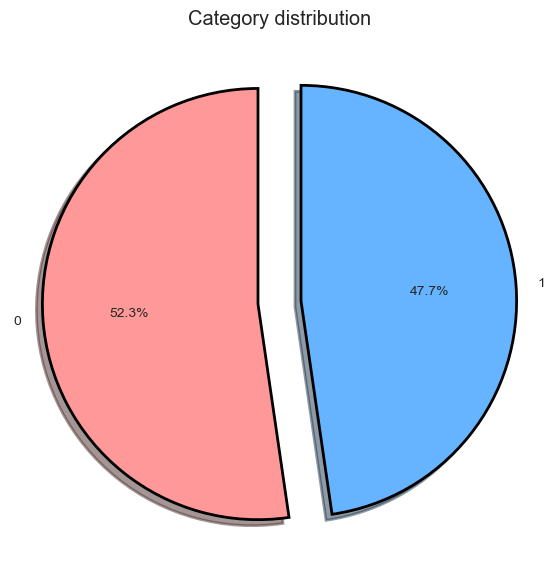

In [37]:
fig = plt.figure(figsize=(7,7))
colors = ("#ff9999", "#66b3ff")
wp = {'linewidth' : 2, 'edgecolor' : "black"}
tags = df['category'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label= '')
plt.title('Category distribution')

In [38]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

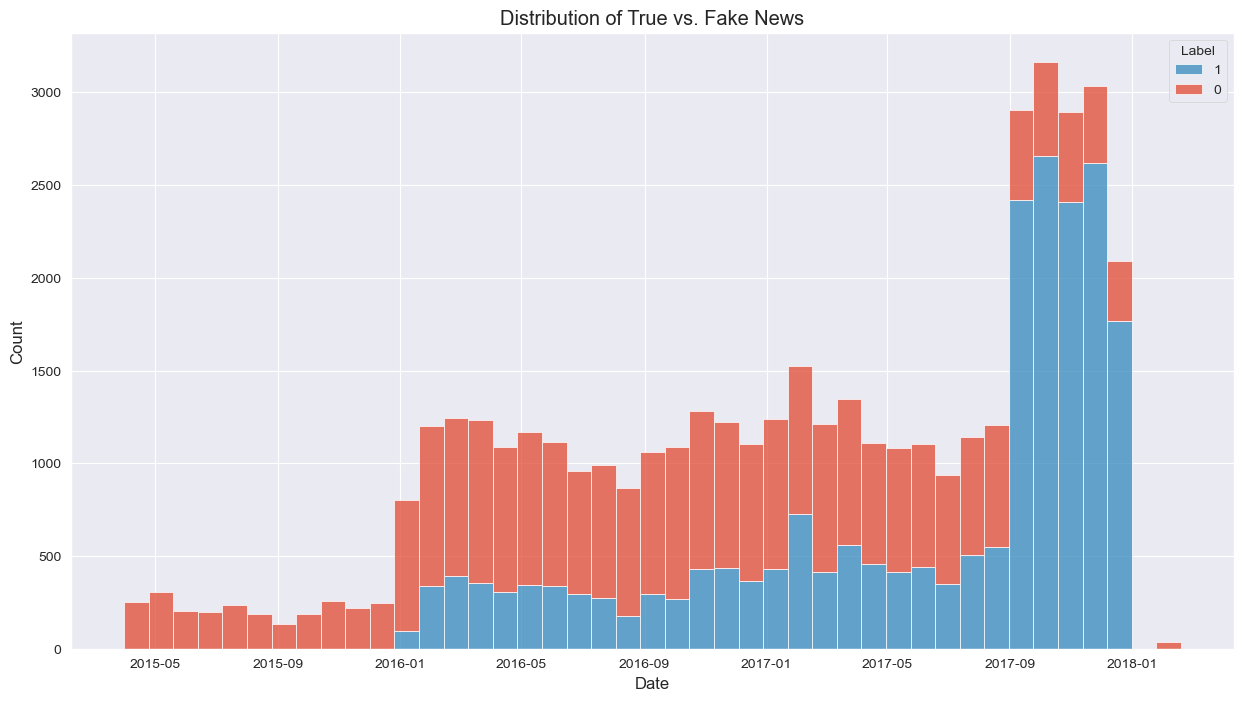

In [39]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='date', hue='category', multiple='stack')
plt.title('Distribution of True vs. Fake News')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

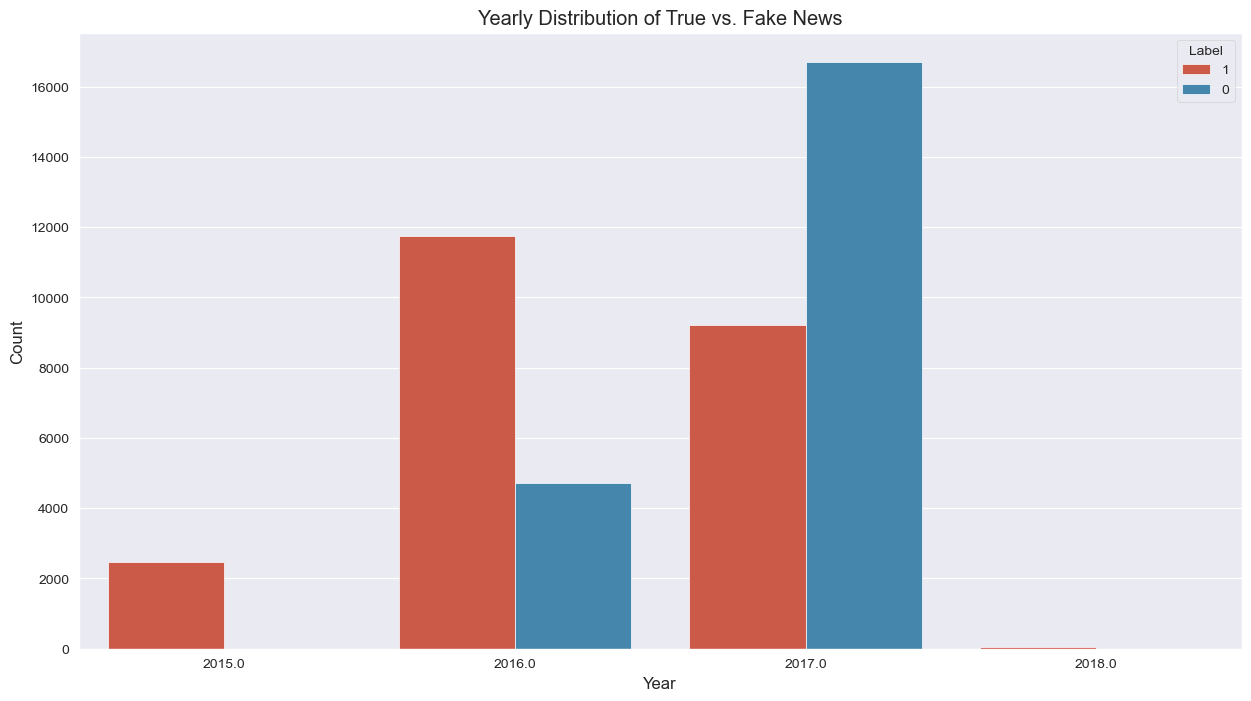

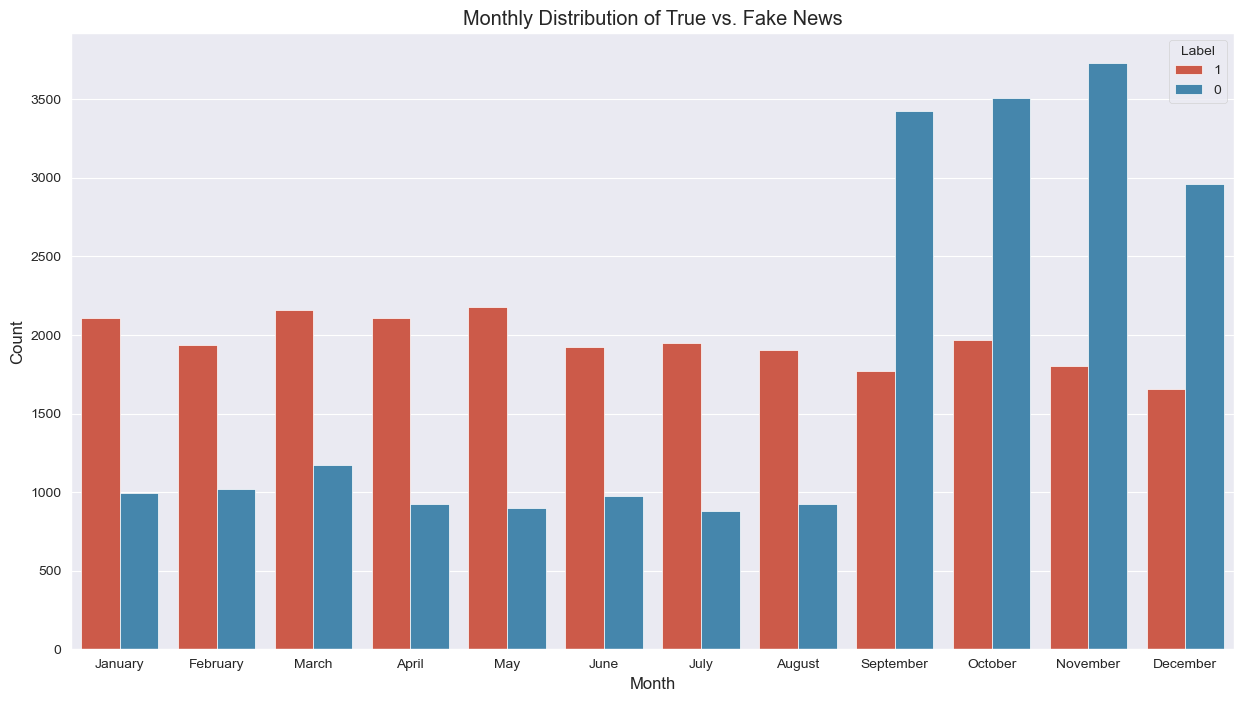

In [40]:
import calendar

month_names = list(calendar.month_name)[1:]

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='year', hue='category')
plt.title('Yearly Distribution of True vs. Fake News')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='month', hue='category')
plt.title('Monthly Distribution of True vs. Fake News')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.xticks(range(12), month_names)
plt.show()

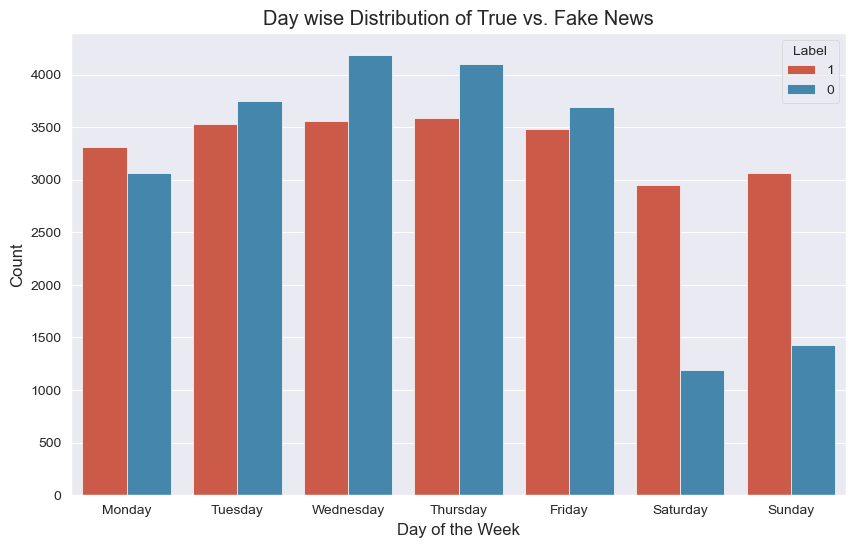

In [41]:
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='category', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day wise Distribution of True vs. Fake News')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

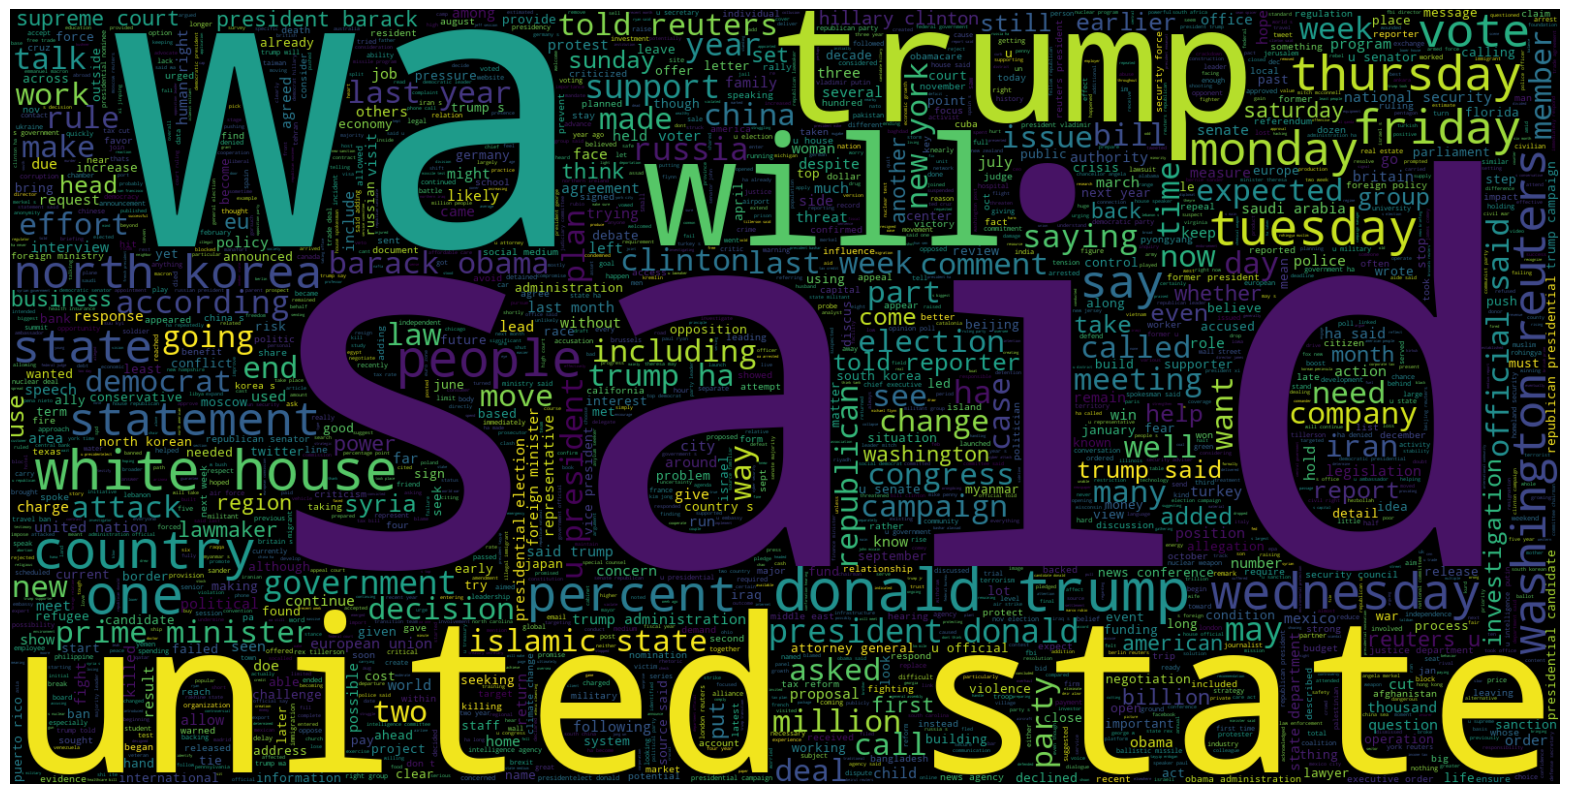

In [42]:
# Exploring most used word in both data sets, True and Fake
# Below is the word cloud for most frequently used words in True dataset

plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category==1].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off') 
plt.savefig('wordcloudTrue.png', bbox_inches='tight', pad_inches=0, transparent=True)

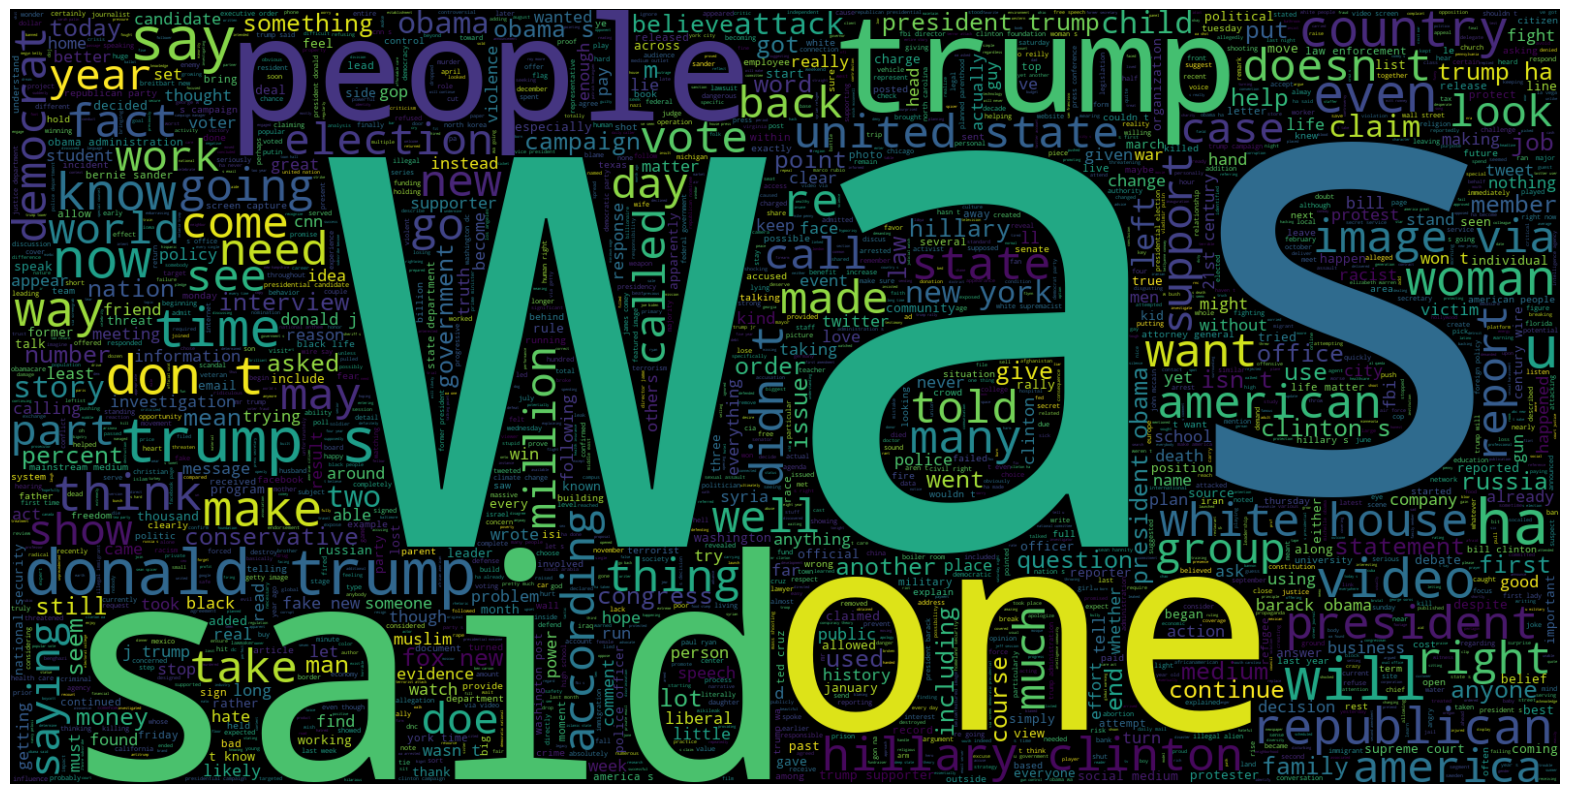

In [43]:
# Exploring most used word in both data sets, True and Fake
# Below is the word cloud for most frequently used words in Fake dataset
plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category==0].text))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off') 
plt.savefig('wordcloudFake.png', bbox_inches='tight', pad_inches=0, transparent=True)

In [44]:
# Below is the graph to show number of available characters in True/Real and Fake news

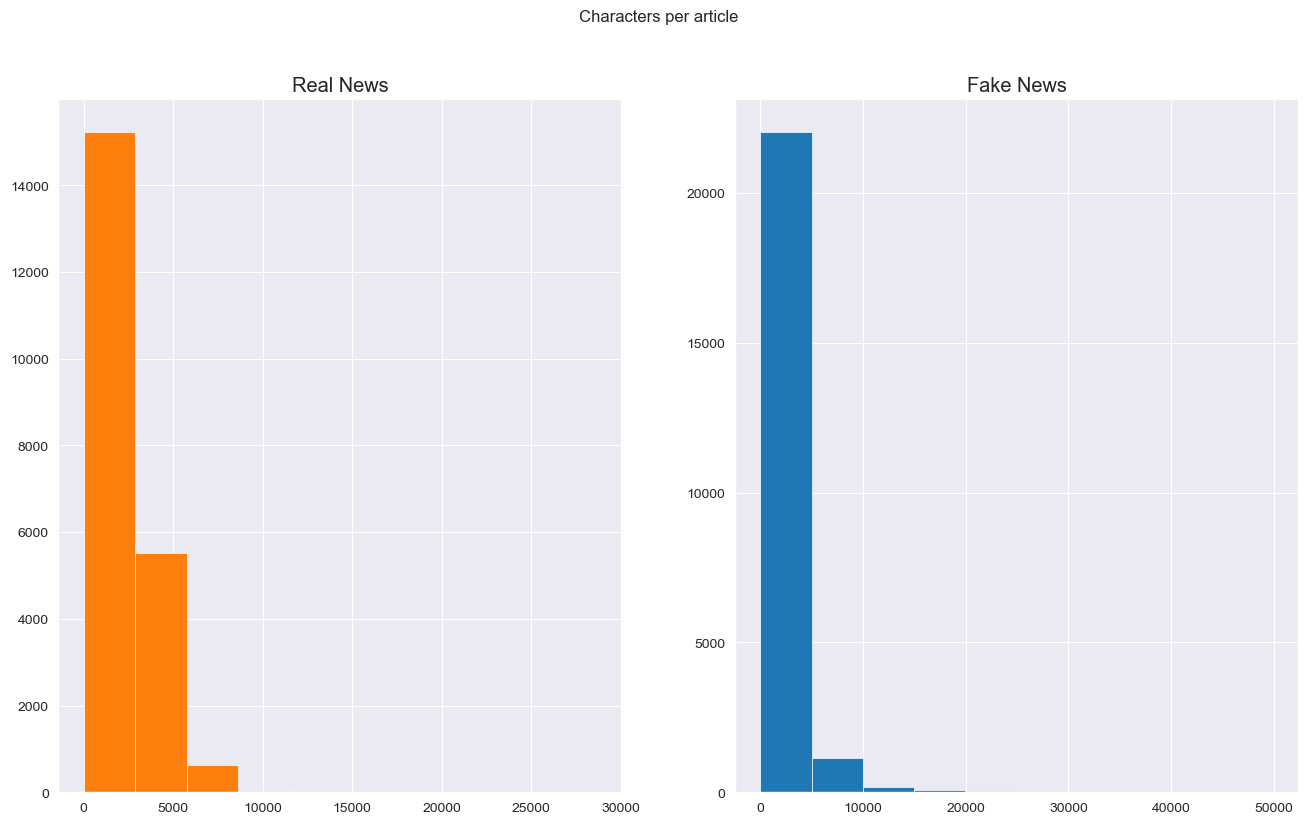

In [45]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len = df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color = 'tab:orange')
ax1.set_title('Real News')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color = 'tab:blue')
ax2.set_title('Fake News')
fig.suptitle('Characters per article')

plt.show()


In [46]:
# By looking at above graph it seems like 5000 or less characters in the text are more common in True/Real News
# where 10000 or less characters are most common in Fake news

In [47]:
# Below graph shows no. of original and fake texts available in both True/Real and Fake news

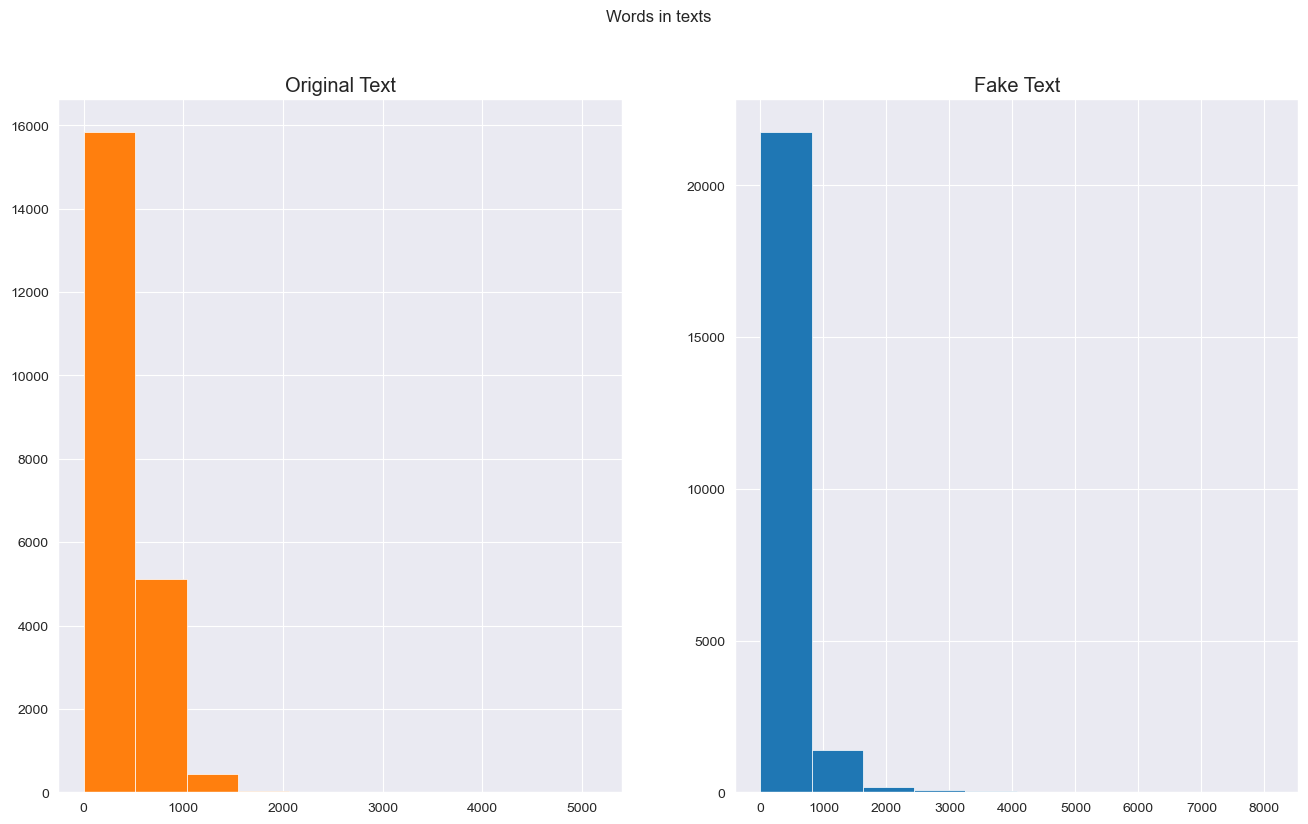

In [48]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len = df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color = 'tab:orange')
ax1.set_title('Original Text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color = 'tab:blue')
ax2.set_title('Fake Text')
fig.suptitle('Words in texts')

plt.show()

In [49]:
df1 = df.drop(['title_len','year','month','day_of_week'],axis=1)
df1.head()

text       subject       date  \
0  italy lower house pass new electoral law move ...     worldnews 2017-10-12   
1  more than 50 arrested for looting in miami dur...     worldnews 2017-09-12   
2  defeat of islamic state in raqqa may herald wi...     worldnews 2017-10-17   
3  new york known wolf halloween truck attacker k...   Middle-east 2017-11-01   
4  democratic vp nominee kaine expected to releas...  politicsNews 2016-09-14   

   category  
0         1  
1         1  
2         1  
3         0  
4         1

# Sentiment Analysis

In [50]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [51]:
df1['polarity'] = df1['text'].apply(polarity)
df1.head(10)

text       subject       date  \
0  italy lower house pass new electoral law move ...     worldnews 2017-10-12   
1  more than 50 arrested for looting in miami dur...     worldnews 2017-09-12   
2  defeat of islamic state in raqqa may herald wi...     worldnews 2017-10-17   
3  new york known wolf halloween truck attacker k...   Middle-east 2017-11-01   
4  democratic vp nominee kaine expected to releas...  politicsNews 2016-09-14   
5  did ron paul just confuse alqaeda with isi or ...          News 2017-08-22   
6  report trump business seeking dozen of special...          News 2017-07-21   
7  trump on twitter dec 21 tax cut home sale the ...  politicsNews 2017-12-21   
8  trump assault writer covering his anniversary ...          News 2016-10-13   
9  president trump warns comeytweets veiled threa...      politics 2017-05-12   

   category  polarity  
0         1 -0.003396  
1         1  0.024276  
2         1  0.092871  
3         0  0.051520  
4         1 -0.033333  
5         0  0.018270  
6         0  0.023724  
7         1  0.089000  
8         0  0.078472  
9         0  0.127885

In [52]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

df1['sentiment'] = df1['polarity'].apply(sentiment)
df1.head()


text       subject       date  \
0  italy lower house pass new electoral law move ...     worldnews 2017-10-12   
1  more than 50 arrested for looting in miami dur...     worldnews 2017-09-12   
2  defeat of islamic state in raqqa may herald wi...     worldnews 2017-10-17   
3  new york known wolf halloween truck attacker k...   Middle-east 2017-11-01   
4  democratic vp nominee kaine expected to releas...  politicsNews 2016-09-14   

   category  polarity sentiment  
0         1 -0.003396  Negative  
1         1  0.024276  Positive  
2         1  0.092871  Positive  
3         0  0.051520  Positive  
4         1 -0.033333  Negative

<Axes: xlabel='sentiment', ylabel='count'>

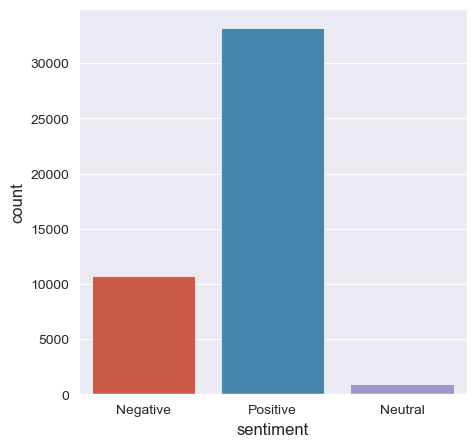

In [53]:
import seaborn as sns
fig = plt.figure(figsize = (5,5))
sns.countplot(x='sentiment', data = df1)

Text(0.5, 1.0, 'Sentiment distribution')

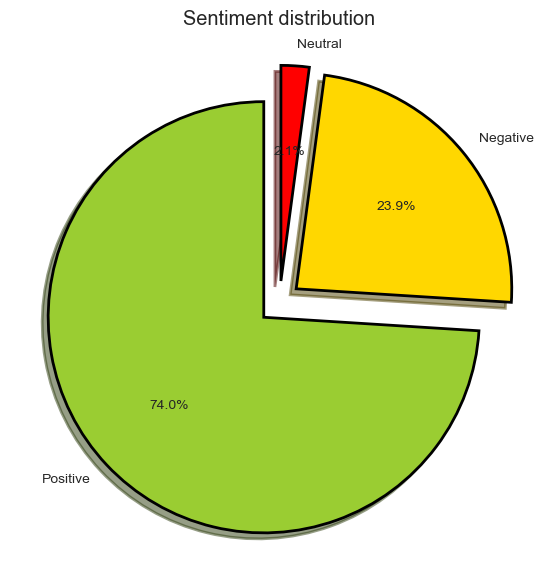

In [54]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold","red")
wp = {'linewidth' : 2, 'edgecolor' : "black"}
tags = df1['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label= '')
plt.title('Sentiment distribution')

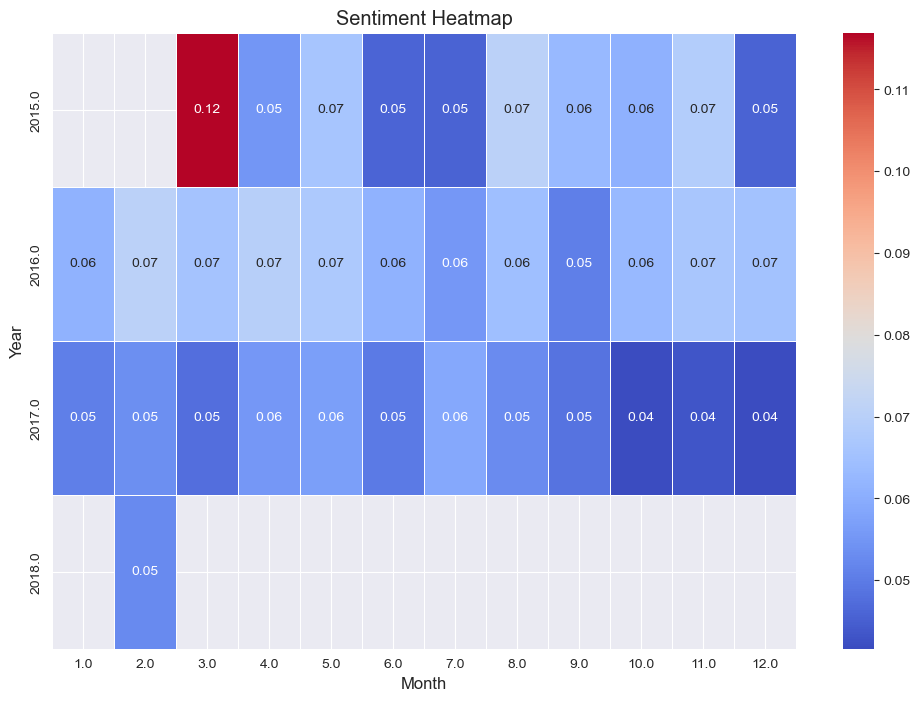

In [55]:
# Create a pivot table to aggregate sentiment scores over months and years
sentiment_pivot = df1.pivot_table(index=df1['date'].dt.year, columns=df1['date'].dt.month, values='polarity', aggfunc='mean')

# Plot the sentiment heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_pivot, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Sentiment Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Model Building

### Spliting of Data

In [56]:
X = df['text']
y = df['category']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Before we can train an algorithm to classify fake news articles, we need to extract features from it. it means reducing the mass of
# unstructured data into some uniform set of attributes that an algorithm can understand. 
# This will help to remove words which appear in more than 70% of the articles

# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [59]:
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [60]:
print(X_train_tfidf[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


# 1.Naive Bayes

In [61]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [62]:
# Predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

In [63]:
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test, y_pred_nb)
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train_tfidf))

print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.9384970905142411
Test Accuracy: 0.9366369710467706


In [64]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      4685
           1       0.94      0.93      0.93      4295

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Confusion Matrix:
 [[4428  257]
 [ 312 3983]]


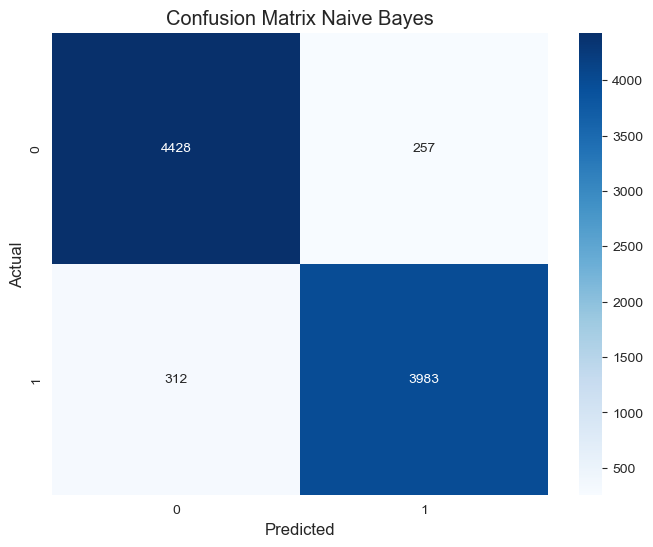

In [65]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [66]:
# 0 -  4368 were fake articles and the model also predicted it as fake
# 0 - 267 artcles were fake however model predicytd as Real
# 1 - 336 artcles were real however predicted as fake
# 1 - 3996 articles were real and predicted as real

# 2.Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4685
           1       0.99      0.99      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4625   60]
 [  49 4246]]


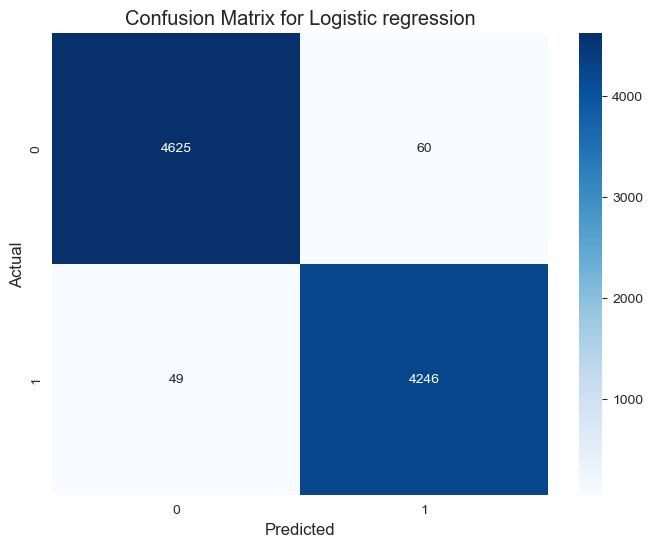

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

# 3.SVM

In [69]:
from sklearn.svm import LinearSVC

# Initialize the SVM classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4685
           1       1.00      0.99      1.00      4295

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4671   14]
 [  22 4273]]


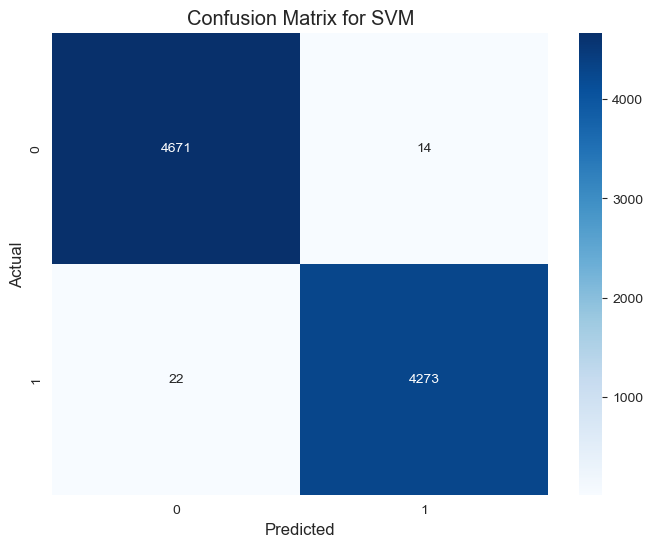

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# 4.Random forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4685
           1       1.00      1.00      1.00      4295

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4680    5]
 [  17 4278]]


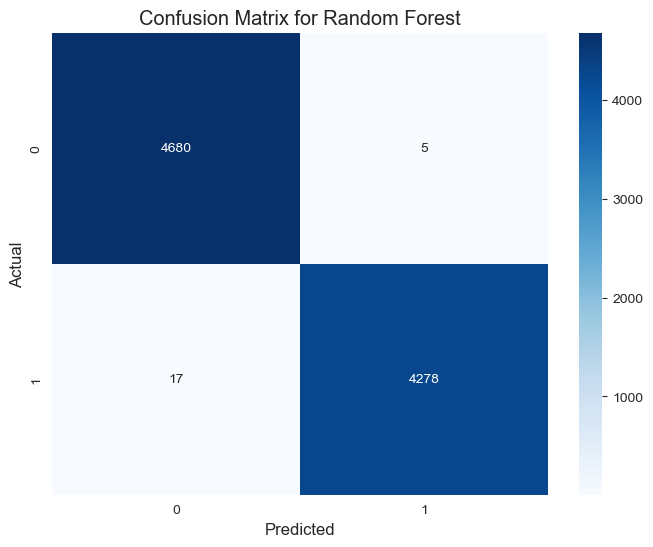

In [72]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# 5. K-Nearest neighbor

# 6.Gradient Boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Random Forest classifier
GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_gb = GB_classifier.predict(X_test_tfidf)

In [74]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4685
           1       1.00      1.00      1.00      4295

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4664   21]
 [  13 4282]]


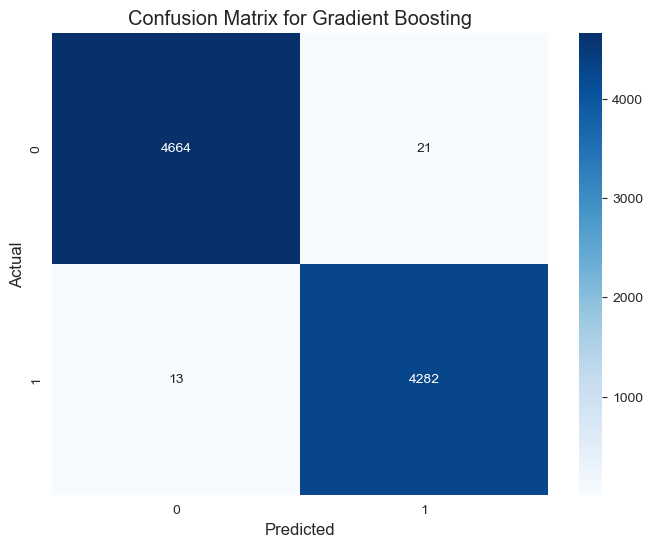

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# 7.Ridge Classifier

In [76]:
from sklearn.linear_model import RidgeClassifier

# Initialize the Random Forest classifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_ridge = ridge_classifier.predict(X_test_tfidf)

In [77]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_ridge))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4685
           1       0.99      1.00      0.99      4295

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4656   29]
 [  17 4278]]


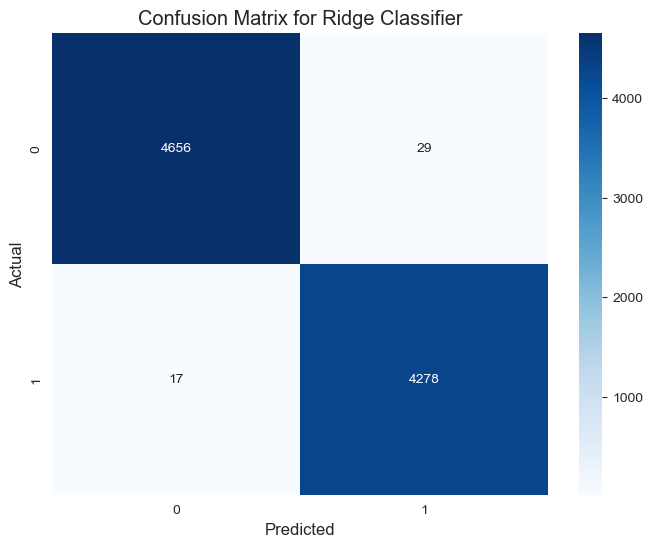

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ridge), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ridge Classifier')
plt.show()

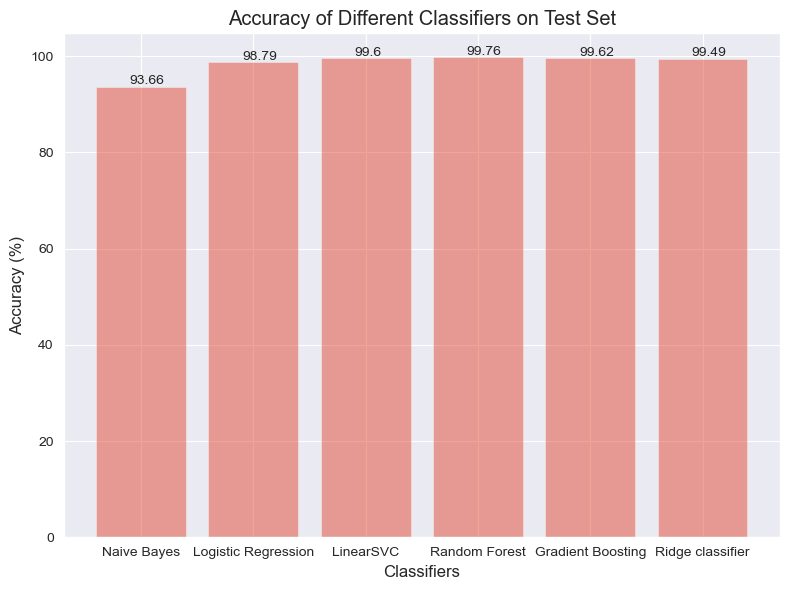

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the accuracy for each classifier
accuracy_nb = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
accuracy_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
accuracy_gb = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
accuracy_ridge = round(accuracy_score(y_test, y_pred_ridge) * 100, 2)

# Create a bar plot for the accuracy of each classifier
classifiers = ['Naive Bayes', 'Logistic Regression', 'LinearSVC', 'Random Forest','Gradient Boosting','Ridge classifier']
accuracy = [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_rf,accuracy_gb,accuracy_ridge]

y_pos = np.arange(len(classifiers))

plt.figure(figsize=(8,6))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers on Test Set')
plt.tight_layout()

# Add labels for the bars
for i in range(len(accuracy)):
    plt.text(x=i-0.1, y=accuracy[i]+0.5, s=str(accuracy[i]))

plt.show()

Making a Predictive System

In [80]:
user_input = ["This is the text that the user wants to predict."]
user_input_tfidf = tfidf_vectorizer.transform(user_input)
user_prediction = rf_classifier.predict(user_input_tfidf)

if user_prediction[0] == 0:
    prediction_result = "false"
else:
    prediction_result = "true"

print("User Input:", user_input[0])
print("Predicted Outcome:", prediction_result)

User Input: This is the text that the user wants to predict.
Predicted Outcome: false


# Deployment

In [81]:
import pickle

In [82]:
fileaname ="Final_model.sav"
pickle.dump(rf_classifier,open(fileaname,'wb'))

In [83]:
load_model=pickle.load(open('Final_model.sav','rb'))

In [84]:
import joblib
from sklearn.ensemble import RandomForestClassifier


In [85]:
joblib.dump(rf_classifier, 'rf_model.pkl')

['rf_model.pkl']

In [86]:
# ... (vectorizer training code for tfidf_vectorizer)

# Save the trained TF-IDF vectorizer to a file named 'tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [87]:

joblib.dump(svm_classifier,'svm_model.pkl')
#joblib.dump(knn_classifier,'knn_model.pkl')
#joblib.dump(GB_classifier,'GB_model.pkl')
#joblib.dump(ridge_classifier,'ridge_model.pkl')

['svm_model.pkl']

In [88]:
joblib.dump(nb_classifier,'nb_model.pkl')
joblib.dump(lr_classifier,'lr_model.pkl')

['lr_model.pkl']